In [0]:
#Check if your runtime is GPU accelerated or not

from tensorflow.python.client import device_lib
hw = device_lib.list_local_devices()
#print(hw)
if "GPU" in str(hw):
  print("Your runtime is GPU accelerated")
else:
  print("Change runtime to GPU accelerated")

Change runtime to GPU accelerated


In [0]:
#Code to download files from google drive to collab

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import sys
import urllib
import time

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

'''
Google Drive is a tag-based (also called semantic) file system, which, for example, allows a file to be in several places at the same time 
(just by adding IDs of folders to the file's parents property)
Hence to get the file/folder ID, navigate to the folder using browser & note the ID from URL 
Ex: https://drive.google.com/drive/folders/1mZVxppM8dHFcoKdc9Vu9vS-n_GGnpCkO
'''

# Auto-iterate through all files in the root folder.
dataset = {
          'train':'1mZVxppM8dHFcoKdc9Vu9vS-n_GGnpCkO', 
          'test':'1czmCOb4w0LiWetvQyhIxi6gGvJuAYb5F',
          'train_cleaned':'1T4uCpfZueGsSUCu145FuEcPY_he6A2fQ'
          }
start = time.time()

for key, value in dataset.items():
  print("Initiating files copy from {} ...".format(key))
  file_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format(value)}).GetList()
  #file_list = drive.ListFile({'q': "'1czmCOb4w0LiWetvQyhIxi6gGvJuAYb5F' in parents and trashed=false"}).GetList()
  for file1 in file_list:
    #Initialize GoogleDriveFile instance with file id.
    file6 = drive.CreateFile({'id': file1['id']})
    file6.GetContentFile(file1['title'])          # Download file as file1['title']
  !mkdir 'datalab/'$key
  !ls -l datalab/
  !mv *.png 'datalab/'$key
  !ls -l datalab/
  print("Completed files copy from {}.".format(key))

end = time.time()                                                                
print('time taken:'+ str(end-start) +'seconds')

Initiating files copy from train ...
mkdir: cannot create directory ‘datalab/train’: File exists
total 16
-rw-r--r-- 1 root root 2218 Jun 16 15:23 adc.json
drwxr-xr-x 2 root root 4096 Jun 16 15:24 test
drwxr-xr-x 2 root root 4096 Jun 16 15:23 train
drwxr-xr-x 2 root root 4096 Jun 16 15:24 train_cleaned
total 16
-rw-r--r-- 1 root root 2218 Jun 16 15:23 adc.json
drwxr-xr-x 2 root root 4096 Jun 16 15:24 test
drwxr-xr-x 2 root root 4096 Jun 16 15:36 train
drwxr-xr-x 2 root root 4096 Jun 16 15:24 train_cleaned
Completed files copy from train.
Initiating files copy from test ...
mkdir: cannot create directory ‘datalab/test’: File exists
total 16
-rw-r--r-- 1 root root 2218 Jun 16 15:23 adc.json
drwxr-xr-x 2 root root 4096 Jun 16 15:24 test
drwxr-xr-x 2 root root 4096 Jun 16 15:36 train
drwxr-xr-x 2 root root 4096 Jun 16 15:24 train_cleaned
total 16
-rw-r--r-- 1 root root 2218 Jun 16 15:23 adc.json
drwxr-xr-x 2 root root 4096 Jun 16 15:37 test
drwxr-xr-x 2 root root 4096 Jun 16 15:36 train
dr

ApiRequestError: ignored

In [0]:
"""
Simple background removal code

__author__ : Rangel Dokov

The basic idea is that we have a foreground object of interest (the dark text)
and we want to remove everything that is not part of this foreground object.

This should produce results somewhere around 0.06 on the leaderboard.
"""
import numpy as np
from scipy import signal
from PIL import Image
from matplotlib import pyplot as plt


def load_image(path):
    return np.asarray(Image.open(path))/255.0

def save(path, img):
    tmp = np.asarray(img*255.0, dtype=np.uint8)
    Image.fromarray(tmp).save(path)

def denoise_image(inp):
    # estimate 'background' color by a median filter
    bg = signal.medfilt2d(inp, 11)
    save('background.png', bg)

    # compute 'foreground' mask as anything that is significantly darker than
    # the background
    mask = inp < bg - 0.1
    save('foreground_mask.png', mask)

    # return the input value for all pixels in the mask or pure white otherwise
    return np.where(mask, inp, 1.0)

inp_path = './datalab/test/76.png'
out_path = 'output.png'

inp = load_image(inp_path)
out = denoise_image(inp)
save(out_path, out)

/content
adc.json  test	train  train_cleaned
73
PNG (540, 420) L


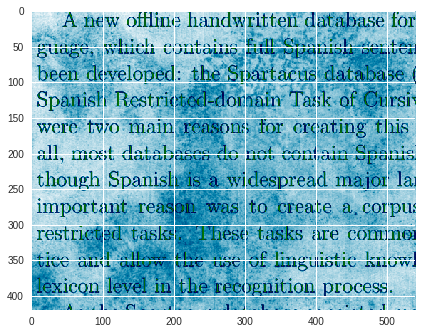

In [0]:
#!rm -rf datalab/train datalab/test datalab/train_cleaned datalab/adc.json
!pwd
#!mkdir -p datalab/train_cleaned
#!mv *.png datalab/train_cleaned
!ls datalab/
!ls -l datalab/test/ | wc -l
im = Image.open("./datalab/test/91.png")
print(im.format, im.size, im.mode)
im.split()
plt.imshow(np.asarray(im), interpolation='nearest', cmap='ocean')
'''
PIL (Python Image Library)
The standard version of show() is not very efficient, since it saves the image to a temporary file and calls the xv utility to display the image. 
If you don’t have xv installed, it won’t even work. When it does work though, it is very handy for debugging and tests.
Hence below function call doesn't display the image
'''
im.show()       #doesn't display image
!mkdir datalab/out

In [0]:
import os
def check_submission(in_path):
  '''
  Number of Predictions (mandated by competition):
  We expect the solution file to have 14230080 prediction rows. This file should have a header row. Please see sample submission file on the data page.
  Below function calculates total entries arrived at using formula = (#images*img.shape[0]*img.shape[1])
  '''
  t=0
  for f in os.listdir(in_path):
    inp_path = in_path+f
    out_path = 'datalab/out/'+f

    inp = load_image(inp_path)
    out = denoise_image(inp)
    save(out_path, out)
    
    img = np.asarray(Image.open(out_path))
    t += img.shape[0]*img.shape[1]
  return t

tick=time.time()
print(check_submission('datalab/test/'))
tock=time.time()
print('time taken: '+str(tock-tick))

14230080
time taken: 26.576579332351685


In [0]:
!ls datalab/out | wc -l
!ls datalab/test | wc -l
!rm eggs.csv
img_no=1
tick=time.time()
for f in os.listdir('datalab/out/'):
  out_path='datalab/out/'+str(f)
  img = np.asarray(Image.open(out_path))/255.0
  print('writing img#{} to csv'.format(img_no))
  for index in np.ndindex(img.shape[:]):    
    with open('eggs.csv', 'a') as csvfile:
        writer = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
        writer.writerow( [ str(f.split('.')[0])+'_'+str(index[0]+1)+'_'+str(index[1]+1) ]+[ str(img[index[0],index[1]]) ] )
  img_no+=1
  tock1=time.time()
  print('time to copy {}: {}'.format(f,str(tock1-tick)))
#   if img_no > 1:
#     break
tock=time.time()
print('time taken: '+str(tock-tick))


72
72
rm: cannot remove 'eggs.csv': No such file or directory
writing img#1 to csv
time to copy 28.png: 9.322813510894775
writing img#2 to csv
time to copy 172.png: 24.466169834136963
writing img#3 to csv
time to copy 214.png: 39.562050580978394
writing img#4 to csv
time to copy 31.png: 48.960813999176025
writing img#5 to csv
time to copy 187.png: 64.0196464061737
writing img#6 to csv
time to copy 151.png: 79.1967203617096
writing img#7 to csv
time to copy 13.png: 88.51983618736267
writing img#8 to csv
time to copy 58.png: 97.85113286972046
writing img#9 to csv
time to copy 1.png: 107.21400737762451
writing img#10 to csv
time to copy 175.png: 122.32019901275635
writing img#11 to csv
time to copy 46.png: 131.60940408706665
writing img#12 to csv
time to copy 184.png: 146.9080674648285
writing img#13 to csv
time to copy 196.png: 162.0688829421997
writing img#14 to csv
time to copy 61.png: 171.61149430274963
writing img#15 to csv
time to copy 103.png: 186.75815725326538
writing img#16 to c

time to copy 181.png: 739.7351336479187
writing img#57 to csv
time to copy 100.png: 755.1068022251129
writing img#58 to csv
time to copy 10.png: 764.5567841529846
writing img#59 to csv
time to copy 205.png: 779.7770872116089
writing img#60 to csv
time to copy 37.png: 789.1012134552002
writing img#61 to csv
time to copy 19.png: 798.3760159015656
writing img#62 to csv
time to copy 16.png: 807.6568462848663
writing img#63 to csv
time to copy 163.png: 822.8337190151215
writing img#64 to csv
time to copy 97.png: 837.9376320838928
writing img#65 to csv
time to copy 145.png: 853.1084806919098
writing img#66 to csv
time to copy 4.png: 862.4130246639252
writing img#67 to csv
time to copy 166.png: 877.5855460166931
writing img#68 to csv
time to copy 202.png: 892.824223279953
writing img#69 to csv
time to copy 142.png: 908.2927005290985
writing img#70 to csv
time to copy 139.png: 923.709662437439
writing img#71 to csv
time to copy 154.png: 939.0132079124451
writing img#72 to csv
time to copy 127.

In [0]:
!ls
'''
files.download is useful for downloading small files from collab book to local drive. 
Note: for bigger file size > 100MB, try storing file to google drive & download thereafter.
'''
from google.colab import files
files.download('eggs.csv')

background.png	datalab  eggs.csv  foreground_mask.png	output.png


In [0]:
# Upload the file to Drive. See:
#
# https://developers.google.com/drive/v3/reference/files/create
# https://developers.google.com/drive/v3/web/manage-uploads
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build
def save_file_to_drive(name, path):
  drive_service = build('drive', 'v3')
  file_metadata = {
  'name': name,
  'mimeType': 'application/octet-stream'
  }
  media = MediaFileUpload(path, mimetype='application/octet-stream',resumable=True)
  created = drive_service.files().create(body=file_metadata, media_body=media,fields='id').execute()
  print('File ID: {}'.format(created.get('id')))
  return created
save_file_to_drive('eggs.csv','/content/eggs.csv')

File ID: 1NQWIC1dGhkdoiDxlTTWsVvseMphmhcz2


{'id': '1NQWIC1dGhkdoiDxlTTWsVvseMphmhcz2'}